# computing HMP on Old subjects data 
This notebook will :
 1) load the MNE epochs as HMP objects
 2) Normalize & apply dimensionality reduction 
 3) fit the data to HMP (3.1 cumulative fitting, 3.2 eliminative fitting, 3.3) 

## 1) load the MNE epochs as HMP objects

In [2]:
from functions import pre_hmp
import sys
import os
import numpy as np
import mne
import pickle
from config import data_dir
import hmp

old_adults_ids = np.arange(601, 618)
# Recovering subject files paths
subj_files = [os.path.join(data_dir,'prehmp', f'S{id}_epochs_preHMP.fif') for id in old_adults_ids]  # Create a list of files with full paths
sfreq = 256 
subject_names = [str(id) for id in old_adults_ids] # subjects names
epoch_data = hmp.io.read_mne_data(subj_files, sfreq=sfreq, data_format='epochs',
                            lower_limit_rt=0.4, upper_limit_rt=2, # the function will filter out trials with RTs outside this range
                            rt_col = 'RT_Correct_CorrPU', scale = 1000, #In this case the rts are contained in the metadata of mne epoch in column "RT_Correct_CorrPU" and is in milliseconds
                            verbose=False, subj_name = subject_names)#Turning verbose off for the documentation but it is recommended to leave it on as some output from MNE might be useful

Processing participant /workspaces/EEG_preprocess/Data/prehmp/S601_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S601_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


55 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S601_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S602_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S602_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


64 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S602_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S603_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S603_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


58 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S603_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S604_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S604_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


78 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S604_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S605_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S605_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


51 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S605_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S606_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S606_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


56 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S606_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S607_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S607_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


54 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S607_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S608_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S608_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


78 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S608_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S609_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S609_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


66 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S609_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S610_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S610_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


75 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S610_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S611_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S611_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


77 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S611_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S612_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S612_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


66 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S612_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S613_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S613_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


72 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S613_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S614_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S614_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


34 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S614_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S615_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S615_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


70 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S615_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S616_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S616_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


71 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S616_epochs_preHMP.fif
Processing participant /workspaces/EEG_preprocess/Data/prehmp/S617_epochs_preHMP.fif's epochs eeg


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/io.py:280: RuntimeWarning: This filename (/workspaces/EEG_preprocess/Data/prehmp/S617_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


60 trials were retained for participant /workspaces/EEG_preprocess/Data/prehmp/S617_epochs_preHMP.fif


## 2) Normalize & apply dimensionality reduction

/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/preprocessing.py:165: UserWarning: Data will be modified inplace, re-read the data or use copy=True if multiplecalls to this function
  warn(
/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/preprocessing.py:347: RuntimeWarning: Mean of empty slice
  mean_last_dim = np.nanmean(data.values, axis=-1)


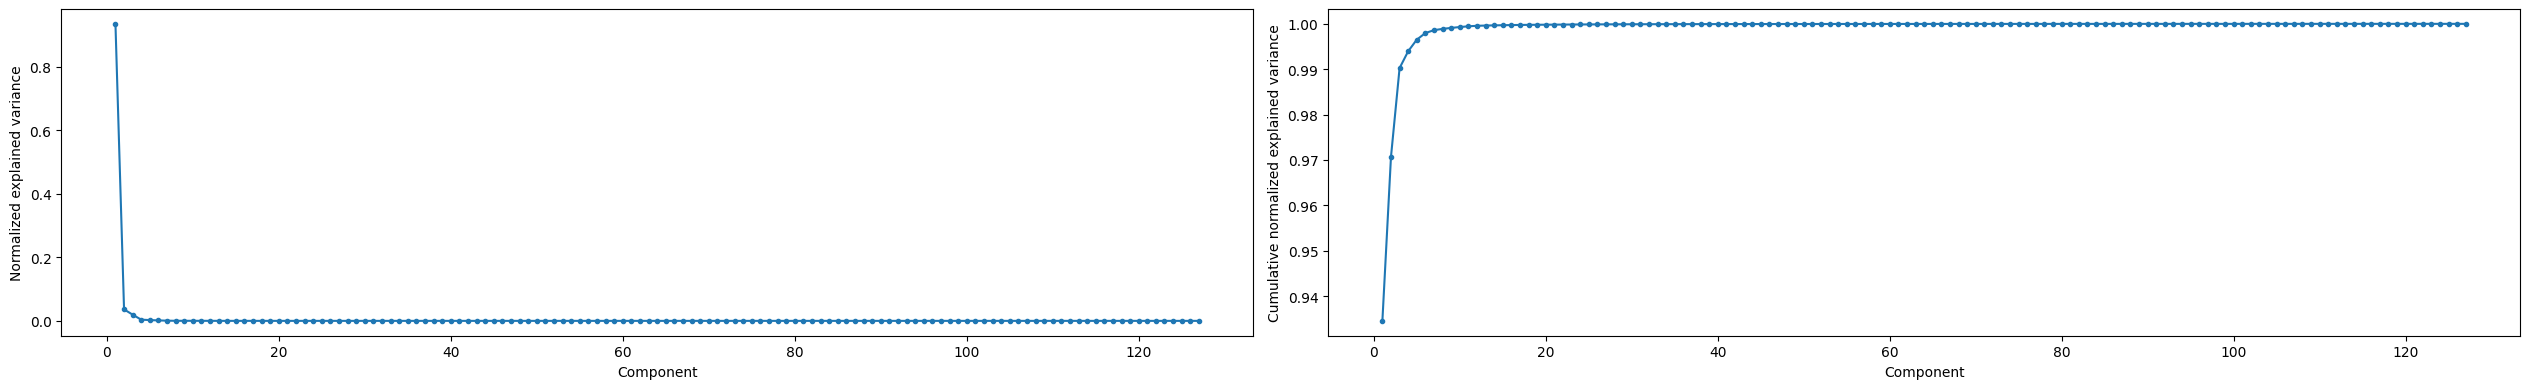

In [3]:
preprocessed = hmp.preprocessing.Standard(epoch_data) # this will ask you to choose the number of components to keep, I chose 6 for 99% variance explained

## 3) fit the data to HMP Model
The main hyperparameter that we want to optimize is the number of events in the HMP model. 

### 3.1)  HMP cumulative fitting 

Here the algoritm start with one event at sample one and the EM algorithm then converges to the first local maximum in the data. Then, fit a two-event model, reusing the first event’s optimal parameters and initializing the second event just after the first. EM again finds the next best event. his process continues incrementally, adding events one by one, until reach the liklihood threshold

In [4]:
# Defining the expected HMP pattern
event_properties = hmp.patterns.HalfSine.create_expected(sfreq=epoch_data.sfreq)
# Performing the crosscorrelation between the preprocessed data and the expected pattern
trial_data = hmp.trialdata.TrialData.from_preprocessed(preprocessed=preprocessed, pattern=event_properties.template)
# bulding the cumulative model
model = hmp.models.CumulativeMethod(event_properties)
# fitting and transforming the data
ll_cumulative, estimates_cumulative = model.fit_transform(trial_data)

  0%|          | 0/226 [00:00<?, ?it/s]

Transition event 1 found around time 66.40625
Transition event 2 found around time 539.0625
Transition event 3 found around time 804.6875

All events found, refitting final combination.
Estimating 3 events model


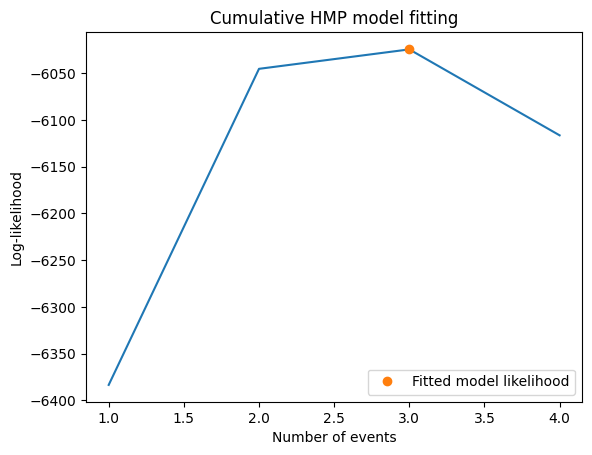

In [5]:
import numpy as np
import matplotlib.pyplot as plt
model_cumulative = model
cumulative_res = np.array([np.array([model_cumulative.submodels[x].n_events, model_cumulative.submodels[x].lkhs[0]]) for x in model_cumulative.submodels])
plt.plot(cumulative_res[:,0], cumulative_res[:,1])
plt.plot(model_cumulative.final_model.n_events, model_cumulative.final_model.lkhs, 'o', label='Fitted model likelihood')
plt.xlabel('Number of events')
plt.ylabel('Log-likelihood')
plt.title('Cumulative HMP model fitting')
plt.legend()

##### plot the events topomap  at their peak average over all trials

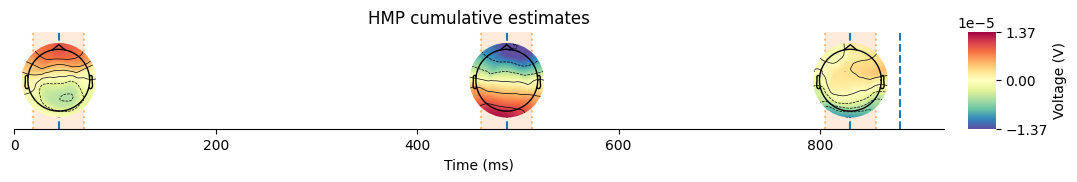

In [6]:
info = mne.io.read_info(subj_files[0], verbose=True)
plot = hmp.visu.plot_topo_timecourse(epoch_data, estimates_cumulative, info, as_time=True, title='HMP cumulative estimates',)


### 3.2)  HMP eliminative fitting

in this approach, firts, we compute the maximum number of events possible (saying how many evenet with minimum duration ( the half sine template) can have in a 2 seconds epoch (max rt) ). we start with the maximum value and iterate down to the minimum number of events(1). by taking differnt starting initializations, we ensure that the parameter space has been properly explored

In [ ]:
# Defining the expected HMP pattern
event_properties = hmp.patterns.HalfSine.create_expected(sfreq=epoch_data.sfreq)
# Performing the crosscorrelation between the preprocessed data and the expected pattern
trial_data = hmp.trialdata.TrialData.from_preprocessed(preprocessed=preprocessed, pattern=event_properties.template)
# bulding the cumulative model

model = hmp.models.eliminative.EliminativeMethod(event_properties)
# fitting and transforming the data
likelihoods , estimates_elim = model.fit_transform(trial_data, cpus=4) 
# save the likelihoods and estimates
with open(os.path.join(data_dir, 'likelihoods_eliminative_old.pkl'), 'wb') as f:
    pickle.dump(likelihoods, f)
with open(os.path.join(data_dir,  'estimates_eliminative_old.pkl'), 'wb') as f:
    pickle.dump(estimates_elim, f) 


Estimating all solutions for maximal number of events (10)
Estimating all solutions for 9 events


  0%|          | 0/10 [00:00<?, ?it/s]

Estimating all solutions for 8 events


  0%|          | 0/9 [00:00<?, ?it/s]

Estimating all solutions for 7 events


  0%|          | 0/8 [00:00<?, ?it/s]

Estimating all solutions for 6 events


  0%|          | 0/7 [00:00<?, ?it/s]

Estimating all solutions for 5 events


  0%|          | 0/6 [00:00<?, ?it/s]

Estimating all solutions for 4 events


  0%|          | 0/5 [00:00<?, ?it/s]

Estimating all solutions for 3 events


  0%|          | 0/4 [00:00<?, ?it/s]

Estimating all solutions for 2 events


  0%|          | 0/3 [00:00<?, ?it/s]

Estimating all solutions for 1 events


  0%|          | 0/2 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/EEG_preprocess/Data/hmp/likelihoods_eliminative_old.pkl'

In [8]:
# save the likelihoods and estimates
with open(os.path.join(data_dir, 'likelihoods_eliminative_old.pkl'), 'wb') as f:
    pickle.dump(likelihoods, f)
with open(os.path.join(data_dir,  'estimates_eliminative_old.pkl'), 'wb') as f:
    pickle.dump(estimates_elim, f) 

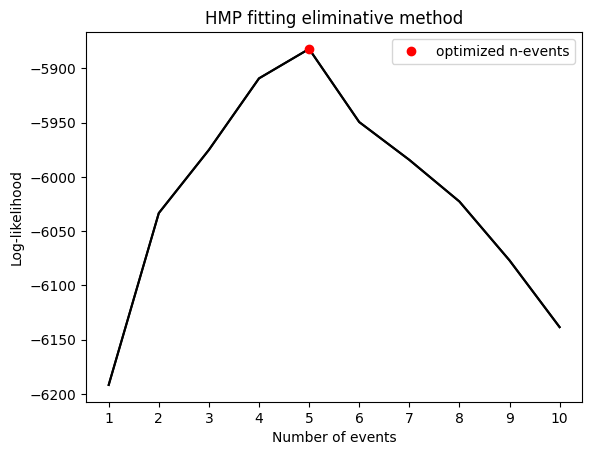

In [16]:
n_events_backward = [model.submodels[i].n_events for i in model.submodels]
plt.plot(n_events_backward, likelihoods, 'k')
max_likelihood = np.max(likelihoods)
n_event_max = n_events_backward[np.argmax(likelihoods)]
plt.plot(n_events_backward, likelihoods, 'k')
plt.plot(n_event_max, max_likelihood, 'ro', label='optimized n-events')
plt.xticks(n_events_backward)
plt.xlabel('Number of events')
plt.ylabel('Log-likelihood')
plt.title('HMP fitting eliminative method')
plt.legend()

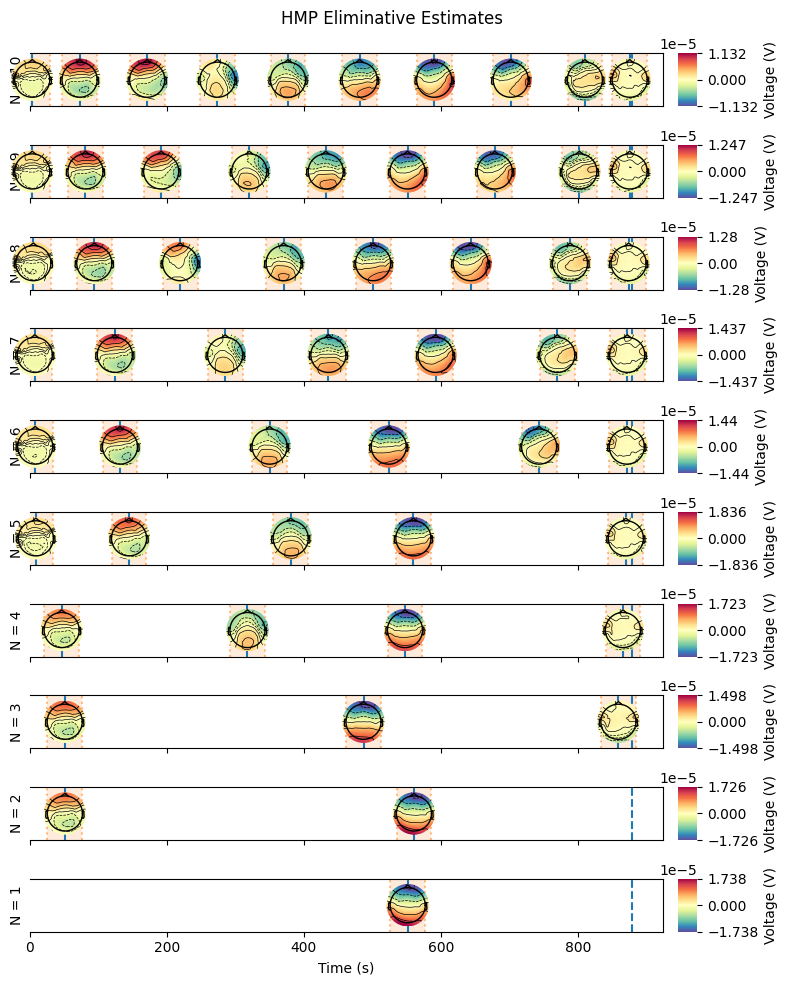

In [11]:

import matplotlib.pyplot as plt
info = mne.io.read_info(subj_files[0], verbose=True)
fig, axes = plt.subplots(len(estimates_elim.n_events), 1, figsize=(8, len(estimates_elim.n_events)), sharex=True)
for ax, n_event in zip(axes, estimates_elim.n_events):
    hmp.visu.plot_topo_timecourse(epoch_data, estimates_elim.sel(n_events=n_event), info, sensors=False, magnify=1, ax=ax, colorbar=True, as_time=True)
    ax.set_ylabel(f"N = {n_event.values}")
plt.xlabel('Time (s)')
plt.suptitle('HMP Eliminative Estimates')

plt.tight_layout()